In [1]:
%load_ext autoreload
%autoreload 2
import drawsvg as draw
import tensorcraft as tc

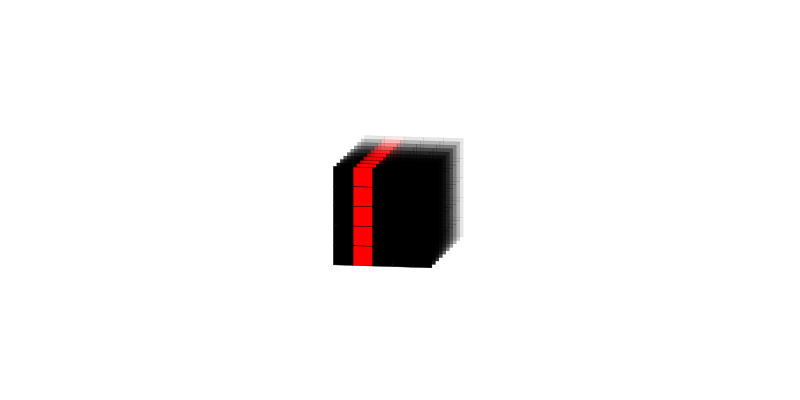

In [2]:
scalar_tensor = tc.Tensor(dims=[5, 5, 10])
scalar_tensor.size
d = draw.Drawing(200, 100, origin='center')
tc.viz.draw_tensor(d, scalar_tensor, cell_size=5, mindex_highlight=(None, 1, None), highlight_color='red')
d.set_pixel_scale(4)  
d

Index variables: ['l', 'k', 'j']
Output shape: Tensor(shape: (50, 5), dist: None, nworkers: 0)
Output index variables: ['j', 'k']
Current x: -190.0
Current x: -165.0
Tensor Samples highlight: (2, None)
Tensor Clusters highlight: (2, None)


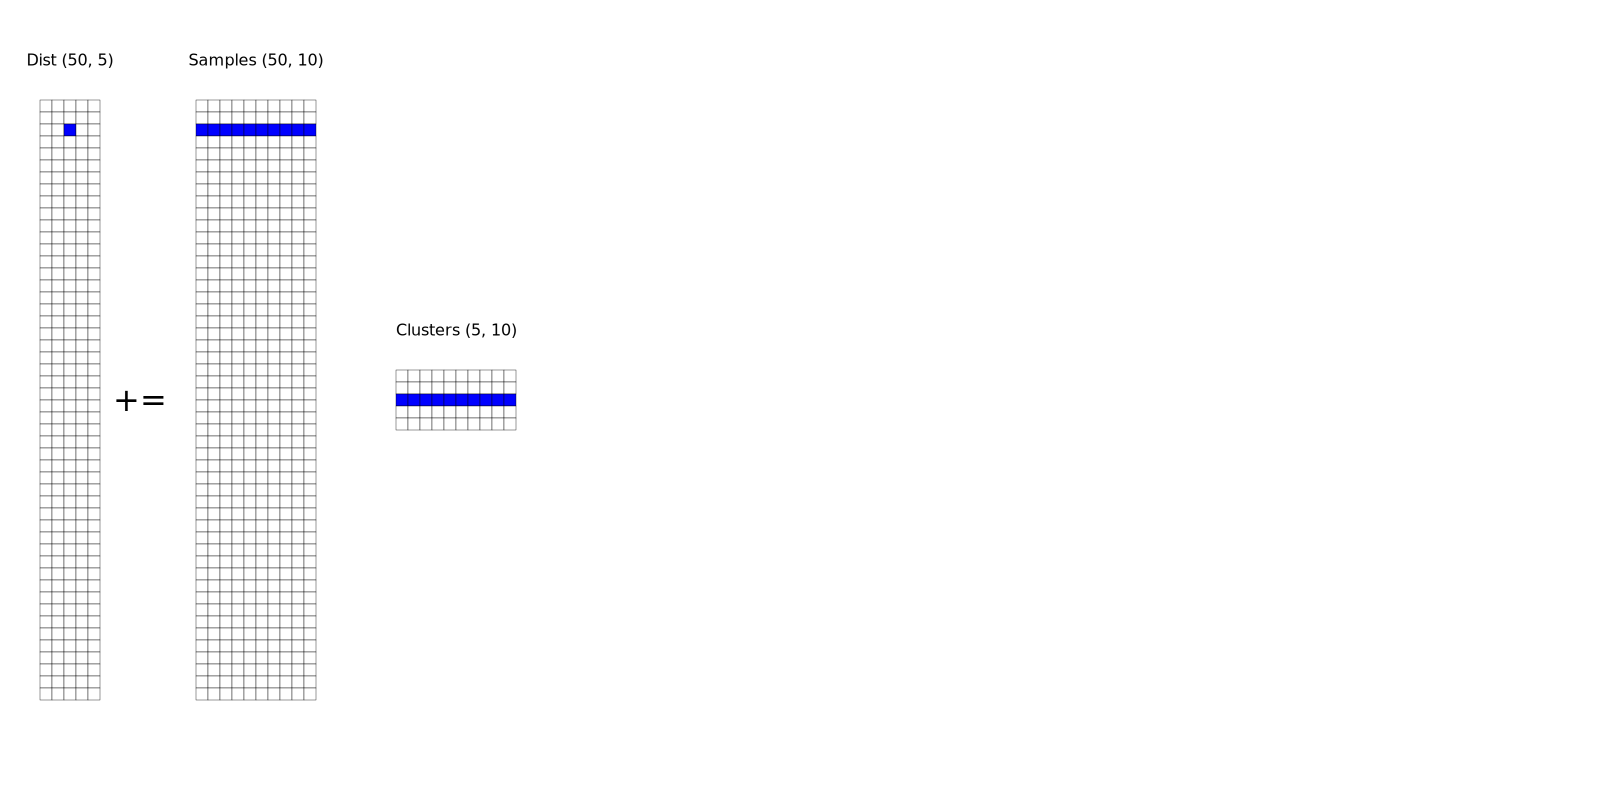

In [18]:
code = """
# Distance computation
Dist[j,k]+=(Samples[j,l]-Clusters[k,l])^2 

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] += ( Dist[j,k] < Min[j] ) * ( Dist[j,k] - Min[j] )
Labels[j] += (Dist[j,k] == Min[j]) * (k - Labels[j])

# # Cluster update
Count[l] += (Labels[j] == l)
Update[l,k] += Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

d = draw.Drawing(400, 200, origin='center')
tc.viz.draw_op(d,
               kmeans_kernel.tensor_expressions[3],
               tensor_shapes={
                   "Samples": tc.Tensor([50, 10]),
                   "Clusters": tc.Tensor([5, 10]),
                   "Dist": tc.Tensor([50, 5]),
               },
               mindex_highlight=(2,2))
d.set_pixel_scale(4)
d


Index variables: ['k', 'j']
Output shape: Tensor(shape: (50,), dist: None, nworkers: 0)
Output index variables: ['j']
Current x: -190.0
Current x: -177.0
Tensor Dist highlight: (2, None)
Tensor Min highlight: (2,)
Tensor Dist highlight: (2, None)
Tensor Min highlight: (2,)


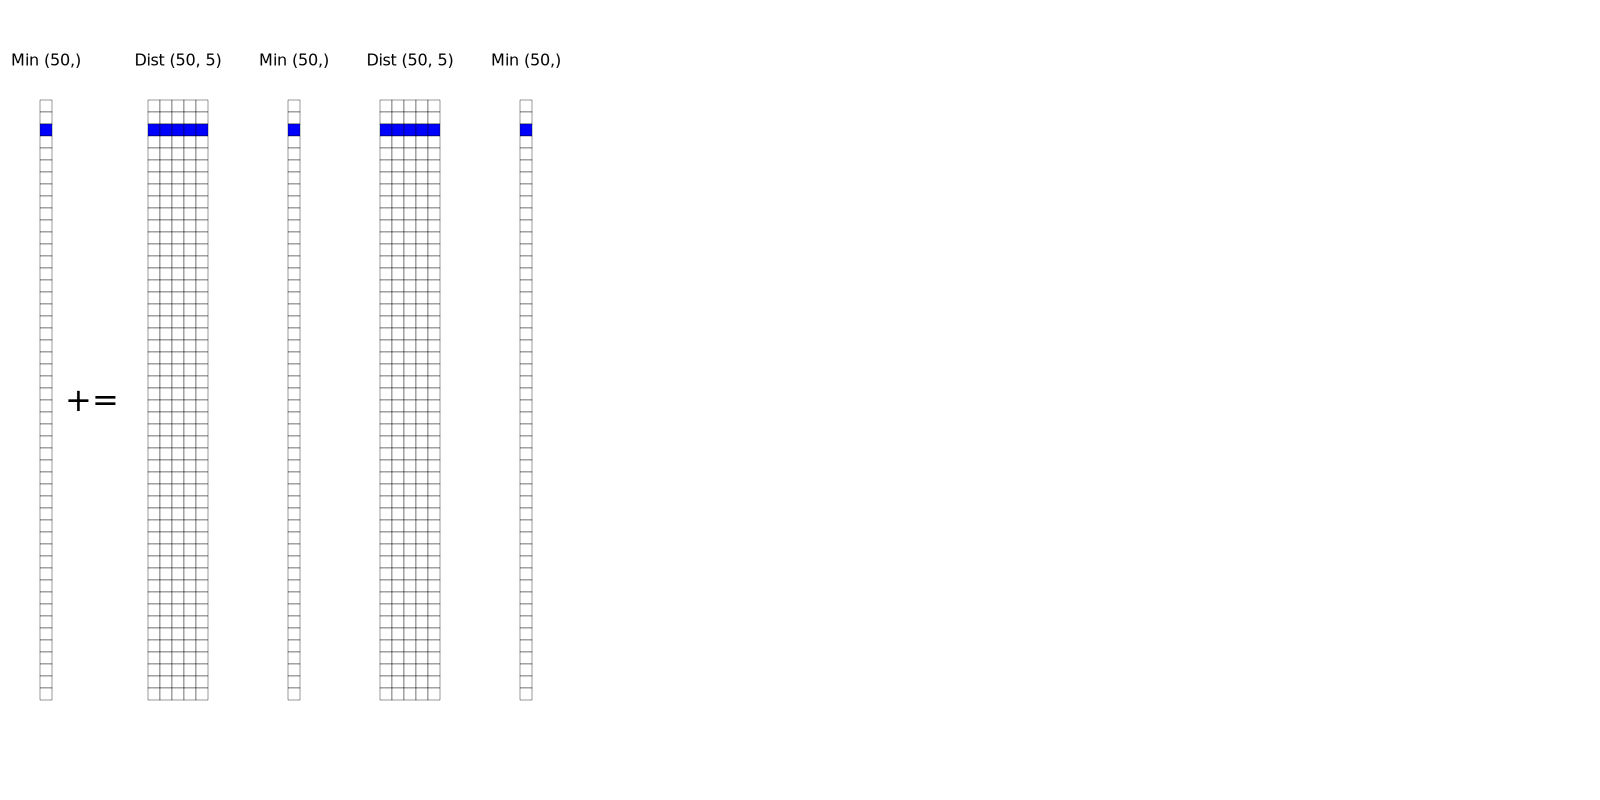

In [19]:
d = draw.Drawing(400, 200, origin='center')
tc.viz.draw_op(d,
               kmeans_kernel.tensor_expressions[8],
               tensor_shapes={
                   "Min": tc.Tensor([50]),
                   "Dist": tc.Tensor([50, 5]),
               },
               mindex_highlight=(2,))
d.set_pixel_scale(4)
d
